In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Acquire
df = pd.read_csv("./employee_attrition_performance.csv")

In [3]:
df.shape

(1470, 35)

In [4]:
# Determine if columns provide no new information
# A column provides no new information if all of the values are the same
columns_to_drop = []

for column in df.columns:
    # If the number of different values is the same as 
    if df[column].value_counts().shape[0] == 1:
        columns_to_drop.append(column)
    
for column in columns_to_drop:
    print(df[column].head(1))
    
# Looks like every employee is over18, works 80 works per pay period, and the EmployeeCount number is 1 for everybody.

# Drop columns that don't add any new information
# Everyone is over 18
# Everyone has 80 standard hours
# The employee count adds no new information

# df = df.drop(columns=["Over18", "StandardHours", "EmployeeCount"])
df = df.drop(columns=columns_to_drop)

0    1
Name: EmployeeCount, dtype: int64
0    Y
Name: Over18, dtype: object
0    80
Name: StandardHours, dtype: int64


In [5]:
# Train, Validate, Test Split
# Stratify on Attrition column (for MVP)
train_validate, test = train_test_split(df, stratify=df.Attrition)
train, validate = train_test_split(train_validate, stratify=train_validate.Attrition)

train.set_index("EmployeeNumber", inplace=True)
validate.set_index("EmployeeNumber", inplace=True)
test.set_index("EmployeeNumber", inplace=True)

In [6]:
train.head(3).T

EmployeeNumber,1329,1015,227
Age,41,30,41
Attrition,No,No,No
BusinessTravel,Non-Travel,Travel_Rarely,Travel_Rarely
DailyRate,256,153,465
Department,Sales,Research & Development,Research & Development
DistanceFromHome,10,8,14
Education,2,2,3
EducationField,Medical,Life Sciences,Life Sciences
EnvironmentSatisfaction,3,2,1
Gender,Male,Female,Male


### Continuous Valued Features
- Age
- DailyRate
- DistanceFromHome
- HourlyRate
- MonthlyIncome (is this a multiple of their rate * hours or something else?)
- MonthlyRate
- PercentSalaryHike
- TotalWorkingYears
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager

### Categorical Features
- Attrition (yes or no)
- BusinessTravel (none, rarely, frequently)
- Department (R&D, Sales, HR)
- Education (1-5)
- EducationField (6 categories)
- EnvironmentSatisfaction (1-4)
- Gender (this data has a binary)
- JobInvolvement (1-4)
- JobLevel (1 through 5)
- JobRole (9 different job role names)
- Job Satisfaction (1 - 4)
- MaritalStatus (single, married, divorced)
- NumCompaniesWorked
- OverTime (yes or no)
- PerformanceRating (3 or 4)
- RelationshipSatisfaction (1 through 4)
- StockOptionLevel (0 through 3)
- TrainingTimesLastYear(0 through 6)
- WorkLifeBalance (1 - 4)

## Some Ideas/Approaches/Questions
- Hypothesis Testing:
    - Set my alpha and run a $chi^2$ for every discrete columnn vs. attrition
    - Is there a chi-squared "equivalent" of ANOVA? 
    - what's the appropriate tool for ordinal/discrete values that tests for independence?
    - Would https://en.wikipedia.org/wiki/Cochran%E2%80%93Armitage_test_for_trend be useful/revelatory here?
    - T-test every continuous value vs. attrition status
- The process automation from above might make for a nice utility function or start of a module

In [7]:
categorical_columns = [
    "BusinessTravel",
    "Department",
    "Education",
    "EducationField",
    "EnvironmentSatisfaction",
    "Gender",
    "JobInvolvement",
    "JobLevel",
    "JobRole",
    "JobSatisfaction",
    "MaritalStatus",
    "NumCompaniesWorked",
    "OverTime",
    "PerformanceRating",
    "RelationshipSatisfaction",
    "StockOptionLevel",
    "TrainingTimesLastYear",
    "WorkLifeBalance"
]

In [11]:
from scipy import stats

# Set alpha to be 1 - .99
alpha = .01 
dependents = []
independents = []

for column in categorical_columns:
    observed = pd.crosstab(df["Attrition"], df[column])
    chi2, p, degf, expected = stats.chi2_contingency(observed)

    if p < alpha:
        dependents.append(column)
    else:
        independents.append(column)
    
output =  {
    "dependent": dependents,
    "independent": independents
}

output["dependent"], output["independent"]

(['BusinessTravel',
  'Department',
  'EducationField',
  'EnvironmentSatisfaction',
  'JobInvolvement',
  'JobLevel',
  'JobRole',
  'JobSatisfaction',
  'MaritalStatus',
  'NumCompaniesWorked',
  'OverTime',
  'StockOptionLevel',
  'WorkLifeBalance'],
 ['Education',
  'Gender',
  'PerformanceRating',
  'RelationshipSatisfaction',
  'TrainingTimesLastYear'])

In [19]:
def get_dependent_and_independent(df, target_variable, categorical_columns, alpha = 0.01):
    
    
    import pandas as pd
    from scipy import stats
    
    dependents = []
    independents = []

    for column in categorical_columns:
        observed = pd.crosstab(df[target_variable], df[column])
        chi2, p, degf, expected = stats.chi2_contingency(observed)

        if p < alpha:
            dependents.append(column)
        else:
            independents.append(column)

    output =  {
        "dependent": dependents,
        "independent": independents
    }

    return output

In [22]:
get_dependent_and_independent(df, "Attrition", categorical_columns)

{'dependent': ['BusinessTravel',
  'Department',
  'EducationField',
  'EnvironmentSatisfaction',
  'JobInvolvement',
  'JobLevel',
  'JobRole',
  'JobSatisfaction',
  'MaritalStatus',
  'NumCompaniesWorked',
  'OverTime',
  'StockOptionLevel',
  'WorkLifeBalance'],
 'independent': ['Education',
  'Gender',
  'PerformanceRating',
  'RelationshipSatisfaction',
  'TrainingTimesLastYear']}

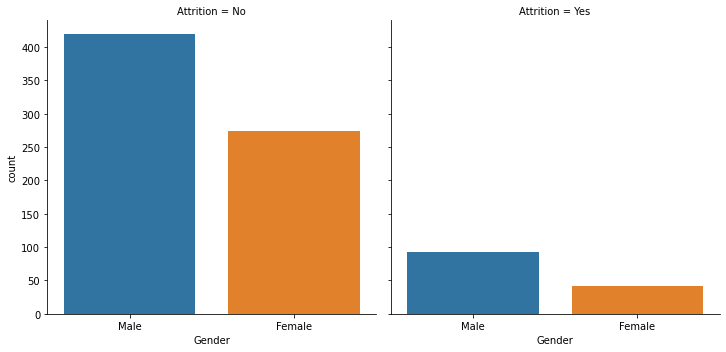

In [10]:
sns.catplot(x="Gender", col="Attrition", data=train, kind="count")